# Finding best degree and lambda(Regularization Parameter) using Cross Validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [14]:
data = io.loadmat('ex5data1.mat')

In [26]:
def compute_cost(x, y, w, lb=0):
    m = y.size
    yhat = np.dot(w, x.T)
    error = yhat-y.T
    reg = (lb/(2*m))*np.sum(w)
    cost = (np.sum(error**2)/(2*m))+reg
    return cost

In [32]:
def gradient_descent(x, y, w, lr=0.001, iters=25000, lb=0):
    cost = []
    wt = []
    m = y.size
    for i in range(iters):
        cost.append(compute_cost(x, y, w))
        wt.append(w)
        w = w*(1-(lr*lb)/m) - (lr*((np.dot(w, x.T)-y.T)@x))/m
    return w

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
sc = StandardScaler()
sc1 = StandardScaler()
x = data['X']
y = data['y']
y = sc1.fit_transform(y)
x = np.insert(x, 0, 1, axis=1)
xval = data['Xval']
xval = np.insert(xval, 0, 1, axis=1)
yval = data['yval']
yval = sc1.fit_transform(yval)
x = sc.fit_transform(x)
xval = sc.fit_transform(xval)
w = np.zeros((1, x.shape[1]))

### Training Set size effect on Performance (in terms of Cost)

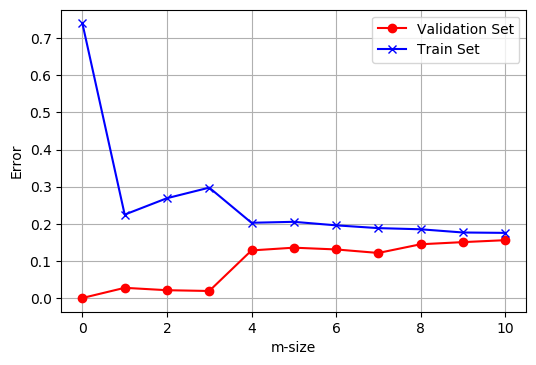

In [57]:
# Training Set effect on Model Performance in terms of error
def tt():
    train = []
    val = []
    for i in range(1, y.size):
        w = np.zeros((1, x.shape[1]))
        xsub = x[:i]
        ysub = y[:i]
        w1 = gradient_descent(xsub, ysub, w)
        train.append(compute_cost(xsub, ysub, w1))
        val.append(compute_cost(xval, yval, w1))

    plt.figure(dpi=100)
    plt.plot(train, 'r-o', val, 'b-x')
    plt.xlabel('m-size')
    plt.ylabel('Error')
    plt.grid(1)
    plt.legend(['Validation Set', 'Train Set'])
tt()

### Finding best degree

Best Degree : 4


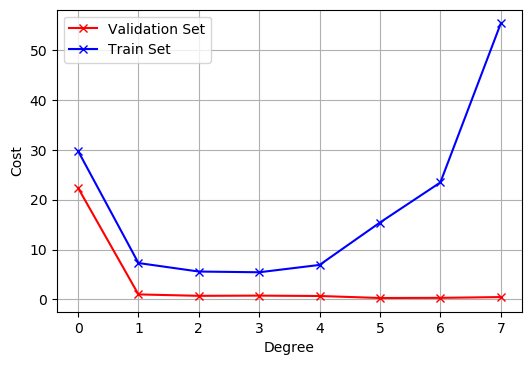

In [58]:
# Experimenting with different degree
def vv():
    train, val = [], []
    for i in range(1, 9):
        x = data['X']
        y = data['y']
        poly = PolynomialFeatures(degree=i)
        xval = data['Xval']
        yval = data['yval']
        x = sc.fit_transform(x)
        x = poly.fit_transform(x)
        xval = sc.fit_transform(xval)
        xval = poly.fit_transform(xval)
        w = np.zeros((1, x.shape[1]))
        w1 = gradient_descent(x, y, w)
        train.append(compute_cost(x, y, w1))
        val.append(compute_cost(xval, yval, w1))
    plt.figure(dpi=100)
    plt.plot(train, 'r-x', val, 'b-x')
    plt.legend(['Validation Set', 'Train Set'])
    plt.grid(1)
    plt.xlabel('Degree')
    plt.ylabel('Cost')
    d = val.index(min(val))+1
    print('Best Degree : %i'%d)
    
vv()

### Finding best Regularization value

Best lambda : 0.640000


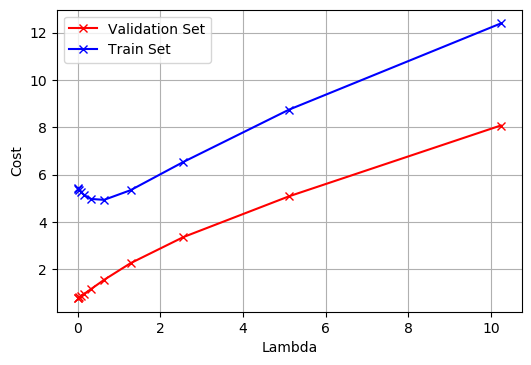

In [51]:
def kk():
    train, val, lbs = [], [], []
    lb = 0.01
    for i in range(11):
        lbs.append(lb)
        x = data['X']
        y = data['y']
        poly = PolynomialFeatures(degree=4)
        xval = data['Xval']
        yval = data['yval']
        x = sc.fit_transform(x)
        x = poly.fit_transform(x)
        xval = sc.fit_transform(xval)
        xval = poly.fit_transform(xval)
        w = np.zeros((1, x.shape[1]))
        w1 = gradient_descent(x, y, w, lb=lb)
        train.append(compute_cost(x, y, w1))
        val.append(compute_cost(xval, yval, w1))
        lb *= 2
    plt.figure(dpi=100)
    plt.plot(lbs, train, 'r-x')
    plt.plot(lbs, val, 'b-x')
    plt.legend(['Validation Set', 'Train Set'])
    plt.grid(1)
    plt.xlabel('Lambda')
    plt.ylabel('Cost')
    print('Best lambda : %f'%(lbs[val.index(min(val))]))
kk()